In [35]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_excel("Tangail_rh.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATIONID              372 non-null    int64  
 1   YEAR                   372 non-null    int64  
 2   MONTH                  372 non-null    int64  
 3   SUMOFHUMIDITY_UPDATED  372 non-null    int64  
 4   MAXOFHUMIDITY_UPDATED  372 non-null    int64  
 5   MINOFHUMIDITY_UPDATED  372 non-null    int64  
 6   AVGOFHUMIDITY_UPDATED  372 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 20.5 KB


In [39]:
new_df = df.loc[:,["STATIONID","YEAR","MONTH","AVGOFHUMIDITY_UPDATED"]]

In [40]:
filt = new_df["YEAR"] != 1987
df_new = new_df[filt]

In [41]:
df_new = df_new.sort_values(by = ["YEAR","MONTH"])

In [42]:
df_new

,STATIONID,YEAR,MONTH,AVGOFHUMIDITY_UPDATED
189,41909,1988,1,73.89
4,41909,1988,2,67.54
5,41909,1988,3,66.98
272,41909,1988,4,71.79
102,41909,1988,5,79.65
...,...,...,...,...
370,41909,2017,9,84.61
371,41909,2017,10,83.54
39,41909,2017,11,79.98
140,41909,2017,12,84.15


In [43]:
monthly_avg = df_new.groupby("MONTH").mean()

In [44]:
import calendar
monthly_avg = monthly_avg.reset_index()
monthly_avg['MONTH'] = monthly_avg['MONTH'].apply(lambda x: calendar.month_abbr[x])

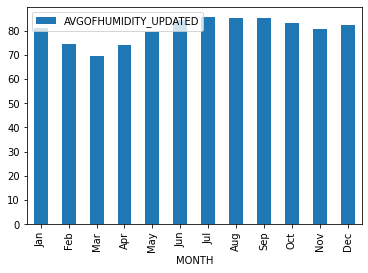

In [45]:
monthly_avg.plot(x = "MONTH",y = "AVGOFHUMIDITY_UPDATED", kind = "bar")

In [46]:
monthly_avg.nlargest(2, "AVGOFHUMIDITY_UPDATED")

,MONTH,STATIONID,YEAR,AVGOFHUMIDITY_UPDATED
6,Jul,41909.0,2002.5,85.584000
8,Sep,41909.0,2002.5,85.379333


In [47]:
monthly_avg.nsmallest(2, "AVGOFHUMIDITY_UPDATED")

,MONTH,STATIONID,YEAR,AVGOFHUMIDITY_UPDATED
2,Mar,41909.0,2002.5,69.577667
3,Apr,41909.0,2002.5,73.901333


In [48]:
monthly_avg.to_excel("tangail_rh_monthly.xls")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
